### **EDA II | 2026 - 1 | Grupo 4  | Práctica 3**
# **Algoritmos de ordenamiento. Parte 3**

Gonzalez Barragan Abraham Elienai
## **Bibliotecas y Función para Crear Arreglo de Nodos**

In [14]:
import random
import matplotlib.pyplot as plt
class Node:
    value = 0
    name = ""
    def __init__(self, intVal, strName):
        self.value = intVal
        self.name = strName
    def __str__(self):
        return self.name + " -> " + str(self.value)
    
def values_str(arr):
    n = len(arr)
    arr_values = [0] * n
    for i in range(n):
        cont = 0
        for j in range(n):
            if arr[j].lower() < arr[i].lower():
                cont += 1
            elif arr[j].lower() == arr[i].lower() and j < i:
                cont += 1
        arr_values[i] = cont
    return arr_values

def create_node_arr(arr, size, type, low_limit, up_limit):
    dogs = ["Labrador Retriever", "Pastor Alemán", "Golden Retriever", "Bulldog Inglés", "Beagle", "Poodle (Caniche)", "Rottweiler", "Yorkshire Terrier", "Dóberman", "Chihuahua", "Shih Tzu", "Boxer", "Husky Siberiano", "Dálmata", "Gran Danés", "Cocker Spaniel", "Bulldog Francés", "Border Collie", "San Bernardo", "Akita Inu"]
    dogs_values = values_str(dogs)
    i = 0
    while i < size:
        if type == 0: # Lista de Nodos con Valores Ordenados Ascendentemente
            element = Node((i + low_limit) % up_limit, "Nodo " + str(i + 1))
        if type == 1: # Lista de Nodos con Valores Ordenados Descendentemente
            element = Node(up_limit - i, "Nodo " + str(i + 1))
        if type == 2: # Lista de Nodos con Valores Aleatorios
            element = Node(random.randint(low_limit, up_limit), "Nodo " + str(i + 1))
        if type == 3: # Lista de Nodos con Palabras
            element = Node(dogs_values[i], dogs[i])
        arr.append(element)
        i += 1

## **Counting Sort**
### **Algoritmo** (Prueba de Ordenamiento y Polinomios):

In [15]:
MAX = 20
def counting_sort(original_arr, aux_arr):                           # Temporal              Espacial
    n = len(aux_arr)                                                # 4                     2
    k = max(aux_arr)                                                # 4                     2
    position_arr = [0] * (k + 1)                                    # 7                     k+1+2
    ordered_arr = [0] * n                                           # 5                     n+2
    
    i = 0                                                           # 3                     2
    while i < n:                                                    # n*4                   1
        position_arr[aux_arr[i]] += 1                               # n*7                   1
        i += 1                                                      # n*5                   1
        
    i = 1                                                           # 3                     1
    while i < k + 1:                                                # (k+1)*6               1
        position_arr[i] += position_arr[i - 1]                      # k*9                   1
        i += 1                                                      # k*5                   1
    
    i = 0                                                           # 3                     1
    while i < n:                                                    # (n+1)*4               1
        ordered_arr[position_arr[aux_arr[i]] - 1] = original_arr[i] # n*9
        position_arr[aux_arr[i]] -= 1                               # n*7                   1
        i += 1                                                      # n*5                   1
    return ordered_arr                                              # 2
                                                                    # 36n+20k+41            k+n+22 <---- Mejor y Promedio
                                        # Peor cuando k = n^2 ->    # 20n^2+36n+41          n^2+n+22 <----Peor
arr = []
aux = []
# lista, tamaño, (0 = ordenado asc, 1 = ordenado desc, 2 = aleatorio, 3 = palabras), límite inf, límite sup)
create_node_arr(arr, MAX, 1, 0, MAX)
for i in range(MAX):
    aux.append(arr[i].value)
    print(arr[i].value)
print("-----------------")
arr = counting_sort(arr, aux)
for i in range(MAX):
    print(arr[i].name)

20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
-----------------
Nodo 20
Nodo 19
Nodo 18
Nodo 17
Nodo 16
Nodo 15
Nodo 14
Nodo 13
Nodo 12
Nodo 11
Nodo 10
Nodo 9
Nodo 8
Nodo 7
Nodo 6
Nodo 5
Nodo 4
Nodo 3
Nodo 2
Nodo 1


### **Algortimo** (Gráfica):

In [16]:
def counting_sort_g(original_arr, aux_arr):
    time = space = 0
    n = len(aux_arr)
    k = max(aux_arr)
    position_arr = [0] * (k + 1)
    ordered_arr = [0] * n
    
    i = 0
    while i < n:
        time += 1
        position_arr[aux_arr[i]] += 1
        i += 1
        
    i = 1
    while i < len(position_arr):
        time += 1
        space += 1
        position_arr[i] += position_arr[i - 1]
        i += 1
    
    i = 0
    while i < n:
        time += 1
        space += 1
        ordered_arr[position_arr[aux_arr[i]] - 1] = original_arr[i]
        position_arr[aux_arr[i]] -= 1
        i += 1
    return ordered_arr, time, space, n, k, n + k

## **Casos Mejor/Promedio**
### $O(n+k)$

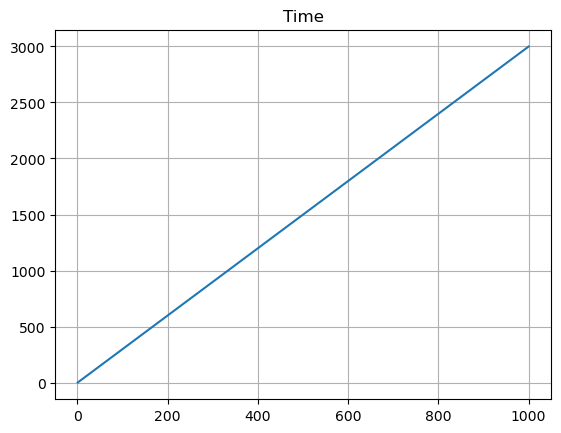

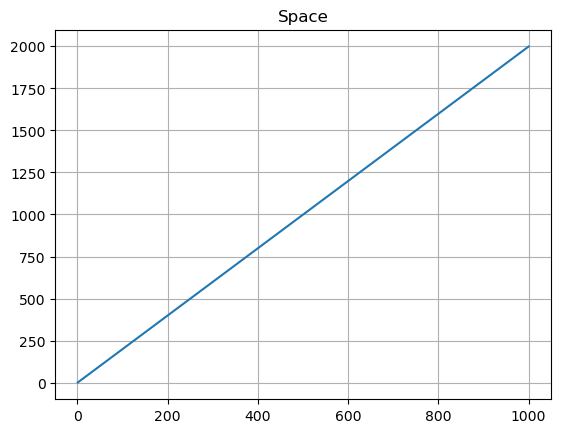

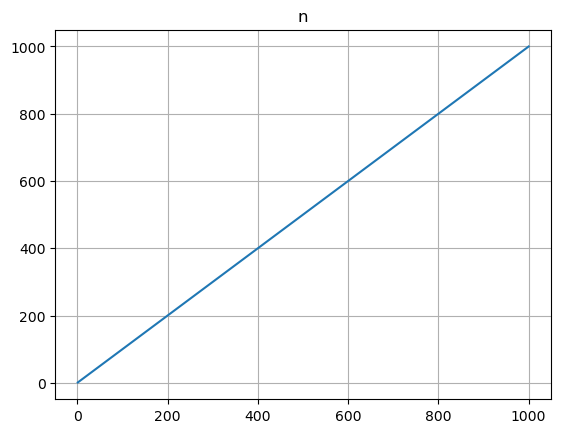

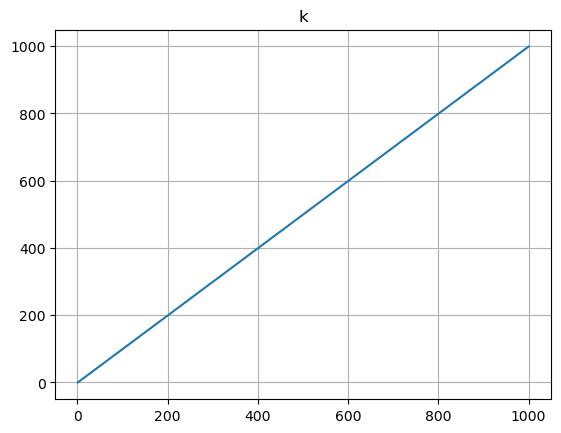

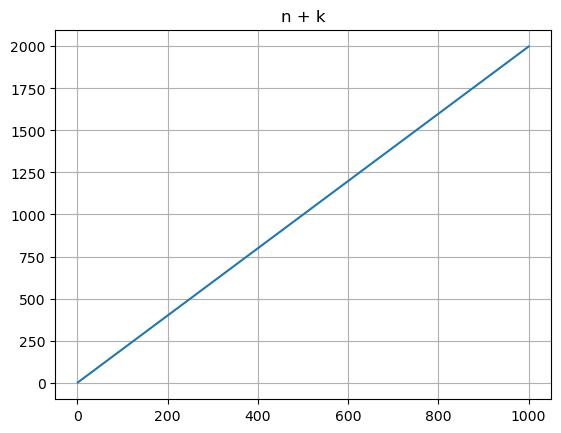

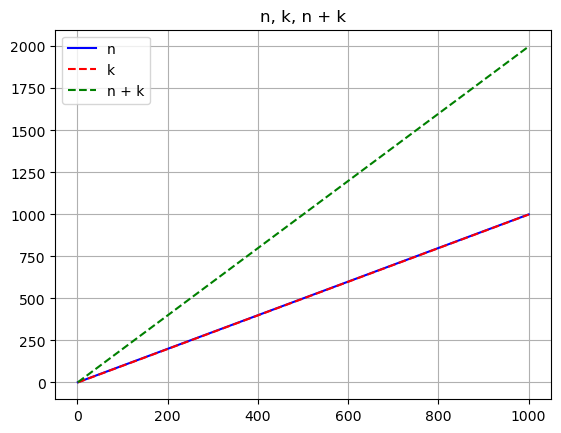

In [28]:
MAX = 1000

x = []
y_time = []
y_space = []
y_n = []
y_k = []
y_nk = []

original_arr = []
aux_arr = []

create_node_arr(original_arr, MAX, 0, 0, MAX)

for i in range(MAX):
    aux_arr.append(original_arr[i].value)

for i in range(MAX):
    copy_arr = original_arr[:i + 1]
    copy_aux = aux_arr[:i + 1]
    
    ordened_arr, time, space, n, k, nk, = counting_sort_g(copy_arr, copy_aux)

    y_time.append(time)
    y_space.append(space)
    y_n.append(n)
    y_k.append(k)
    y_nk.append(nk)
    x.append(len(ordened_arr))

y_s = [y_time, y_space, y_n, y_k, y_nk]

for i in range(len(y_s)):
    if i == 0: plt.title('Time')
    if i == 1: plt.title('Space')
    if i == 2: plt.title('n')
    if i == 3: plt.title('k')
    if i == 4: plt.title('n + k')
    plt.plot(x, y_s[i])
    plt.grid(True)
    plt.show()
    
plt.title('n, k, n + k')
plt.plot(x, y_n, color = 'blue', label = "n")
plt.plot(x, y_k, color = 'red', linestyle = '--', label = "k")
plt.plot(x, y_nk, color = 'green', linestyle = '--', label = "n + k")
plt.grid(True)
plt.legend()
plt.show()

## **Peor Caso**

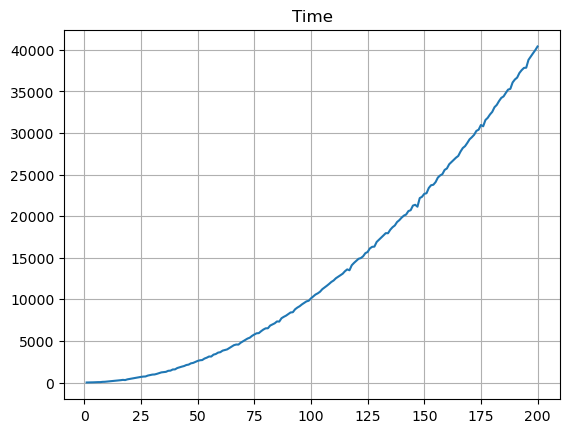

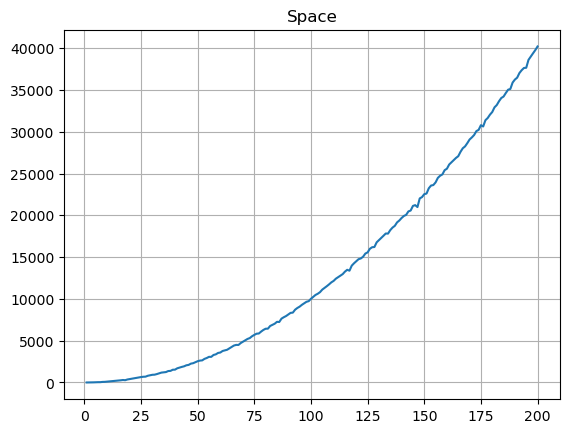

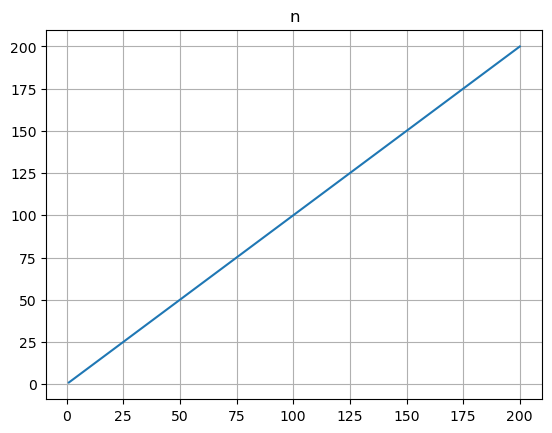

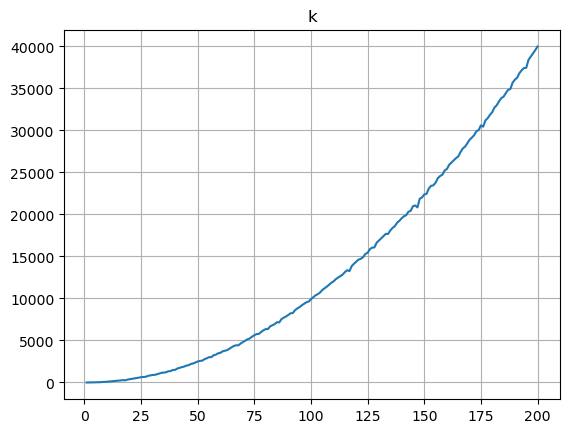

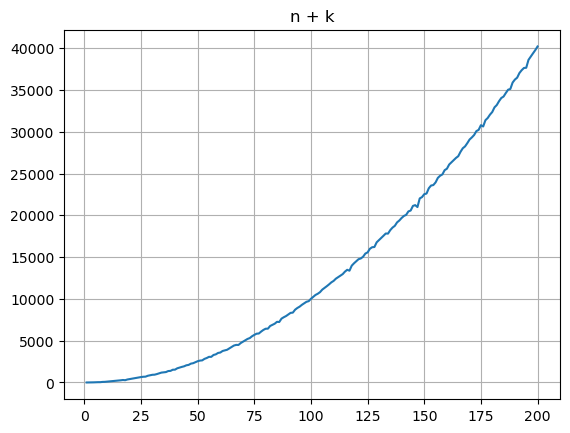

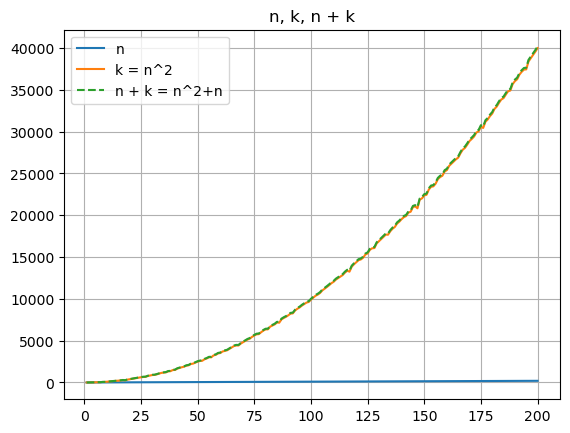

In [18]:
MAX = 200

x = []
y_time = []
y_space = []
y_n = []
y_k = []
y_nk = []

for i in range(1, MAX + 1):
    n_actual = i
    k_actual = n_actual ** 2

    arr = []
    aux = []
    
    create_node_arr(arr, n_actual, 2, 0, k_actual)
    
    for node in arr:
        aux.append(node.value)
        
    ordened_arr, time, space, n, k, nk = counting_sort_g(arr, aux)

    y_time.append(time)
    y_space.append(space)
    y_n.append(n)
    y_k.append(k)
    y_nk.append(nk)
    x.append(len(ordened_arr))

y_s = [y_time, y_space, y_n, y_k, y_nk]
titles = ['Time', 'Space', 'n', 'k', 'n + k']

for i in range(len(y_s)):
    plt.title(titles[i])
    plt.plot(x, y_s[i])
    plt.grid(True)
    plt.show()
    
plt.title('n, k, n + k')
plt.plot(x, y_n, label="n")
plt.plot(x, y_k, label="k = n^2")
plt.plot(x, y_nk, linestyle='--', label="n + k = n^2+n")
plt.grid(True)
plt.legend()
plt.show()

## **Radix Sort**
### **Algoritmo** (Prueba de Ordenamiento y Polinomio):

In [19]:
MAX = 20
def radix_sort(original_arr, aux_arr):                          # Temporal                      Espacial
    n = len(aux_arr)                                            # 4                             2
    k = max(aux_arr)                                            # 4                             2
    exp = 1                                                     # 3                             2
                                                                # d = n dígitos de k            
    while k // exp > 0:                                         # d*6                           
        temp_arr = [0] * n                                      # 5                             n+2
        temp_aux_arr = [0] * n                                  # 5                             n+2
        position_arr = [0] * 10                                 # 5                             k+11    =   10+11
        i = 0                                                   # 3                             2
        while i < n:                                            # (n+1)*4                       1
            digit = (aux_arr[i] // exp) % 10                    # 8                             2
            position_arr[digit] += 1                            # 6                             2
            i += 1                                              # 5                             2
        i = 1                                                   # 3                             1
        while i < 10:                                           # k*4=10*4                      1
            position_arr[i] += position_arr[i - 1]              # 9                             2
            i += 1                                              # 5                             1
        i = n - 1                                               # 5                             1
        while i >= 0:                                           # (n+1)*5                       1
            digit = (aux_arr[i] // exp) % 10                    # 8                             2
            nueva_posicion = position_arr[digit] - 1            # 6                             2
            temp_arr[nueva_posicion] = original_arr[i]          # 5                             2
            temp_aux_arr[nueva_posicion] = aux_arr[i]           # 5                             2
            position_arr[digit] -= 1                            # 6                             2
            i -= 1                                              # 5                             1
        original_arr[:] = temp_arr                              # 3                             1
        aux_arr[:] = temp_aux_arr                               # 3                             1
        exp *= 10                                               # 5                             1
    return original_arr                                         # 2
                                # primer while interno =        4(n+1)+n(19)
                                # segundo while interno =       4k+k(14)
                                # terce while interno =         5(n+1)+n(35)
                                #                               ------------
                                # suma de whiles =              63n+19k+9
                                # ctes dentro del while d =     39
                                #                               ------------
                                # while externo =               d(63n+19k+38)
                                # ctes externas =               14
                                #                               ------------
                                # total =                       d(63n+19k+38)+14                2n+k+43
                                #                               si k = 10                       sin k:
                                #                             = d(55n+228)+14                   = 2n+53 <--------- Mejor/Promedio Time y Space
                                # Peor k = n^2                  d es proporcional a log(k)      = n^2+2n+43 <---------Peor Space
                                #                               y si k=n^2 -> d=log(n^2)=2log(n)
                                #                               sustituyendo d en la pol mejor
                                #                             = 2log(n)(55n+228)+14 = (55)2nlog+(228)2log(n)+14 <-------- Peor Temporal
arr = []
aux = []
# lista, tamaño, (0 = ordenado asc, 1 = ordenado desc, 2 = aleatorio, 3 = palabras), límite inf, límite sup)
create_node_arr(arr, MAX, 0, 0, MAX)
for i in range(MAX):
    aux.append(arr[i].value)
    print(arr[i])
print("-----------------")
arr = counting_sort(arr, aux)
for i in range(MAX):
    print(arr[i])

Nodo 1 -> 0
Nodo 2 -> 1
Nodo 3 -> 2
Nodo 4 -> 3
Nodo 5 -> 4
Nodo 6 -> 5
Nodo 7 -> 6
Nodo 8 -> 7
Nodo 9 -> 8
Nodo 10 -> 9
Nodo 11 -> 10
Nodo 12 -> 11
Nodo 13 -> 12
Nodo 14 -> 13
Nodo 15 -> 14
Nodo 16 -> 15
Nodo 17 -> 16
Nodo 18 -> 17
Nodo 19 -> 18
Nodo 20 -> 19
-----------------
Nodo 1 -> 0
Nodo 2 -> 1
Nodo 3 -> 2
Nodo 4 -> 3
Nodo 5 -> 4
Nodo 6 -> 5
Nodo 7 -> 6
Nodo 8 -> 7
Nodo 9 -> 8
Nodo 10 -> 9
Nodo 11 -> 10
Nodo 12 -> 11
Nodo 13 -> 12
Nodo 14 -> 13
Nodo 15 -> 14
Nodo 16 -> 15
Nodo 17 -> 16
Nodo 18 -> 17
Nodo 19 -> 18
Nodo 20 -> 19


### **Algortimo** (Gráfica):

In [20]:
def radix_sort_g(original_arr, aux_arr):
    n = len(aux_arr)
    k = max(aux_arr)
    exp = 1
    time = space = 0
    d = 0
    while k // exp > 0:
        d += 1
        temp_arr = [0] * n
        temp_aux_arr = [0] * n
        position_arr = [0] * 10
        i = 0
        while i < n:
            space += 1
            digit = (aux_arr[i] // exp) % 10
            position_arr[digit] += 1
            time += 1
            i += 1
        i = 1
        while i < 10:
            position_arr[i] += position_arr[i - 1]
            space += 1
            time += 1
            i += 1
        i = n - 1
        while i >= 0:
            digit = (aux_arr[i] // exp) % 10
            nueva_posicion = position_arr[digit] - 1
            temp_arr[nueva_posicion] = original_arr[i]
            temp_aux_arr[nueva_posicion] = aux_arr[i]
            position_arr[digit] -= 1
            time += 1
            i -= 1
        original_arr[:] = temp_arr
        aux_arr[:] = temp_aux_arr
        exp *= 10

    return original_arr, time, space, n, k, d, n+k, d*(n + k)

## **Casos Mejor/Promedio**

### $O(d(n+k))$ 

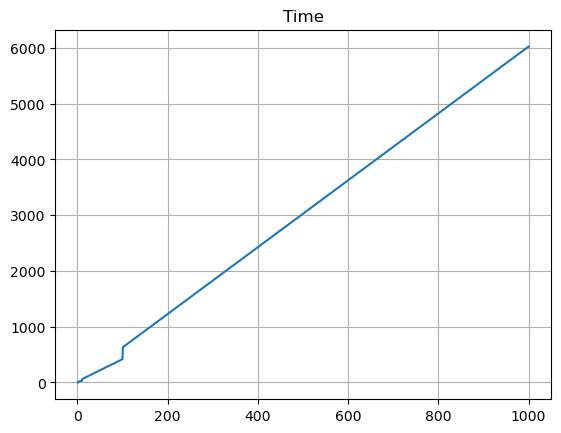

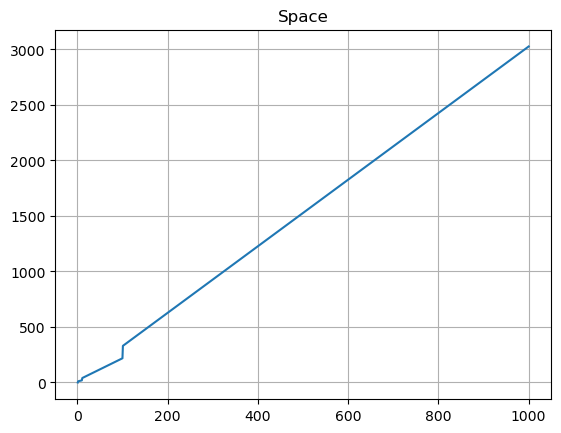

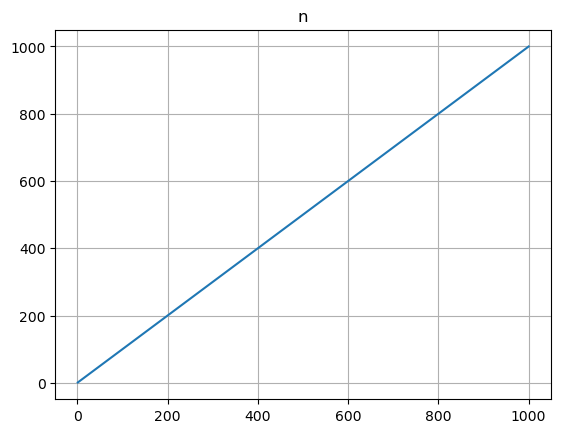

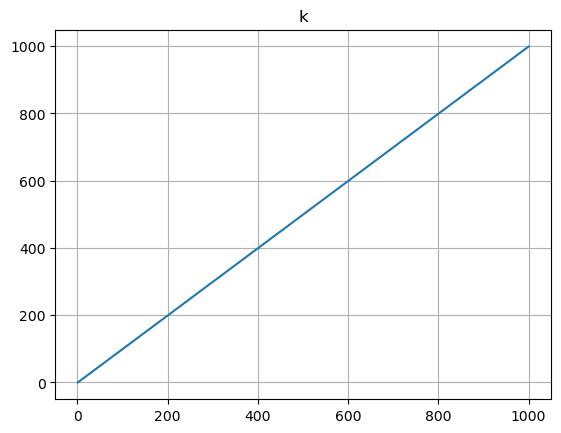

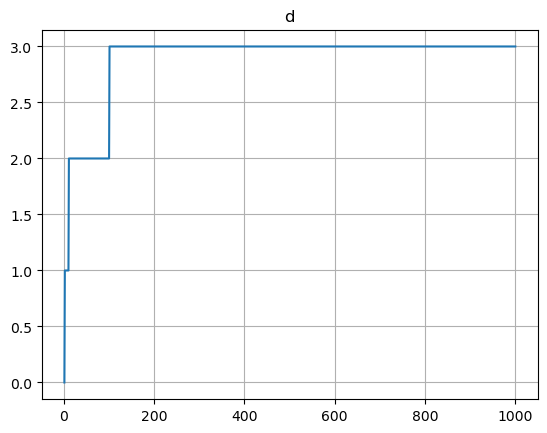

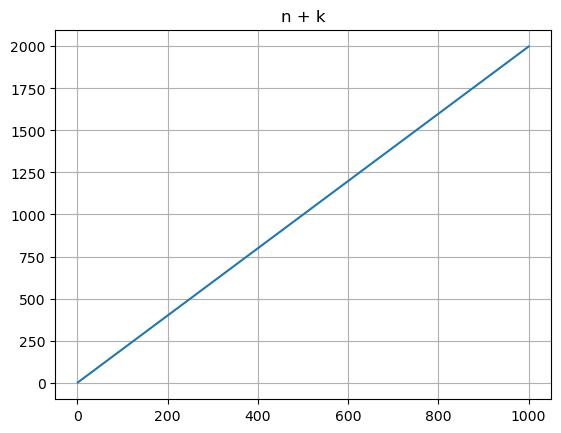

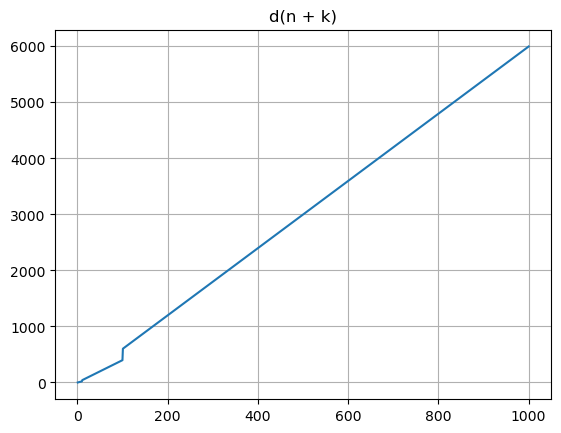

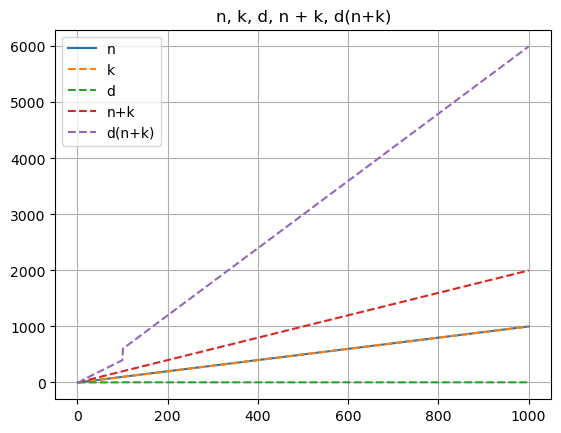

In [21]:
MAX = 1000

x = []
y_time = []
y_space = []
y_n = []
y_k = []
y_d = []
y_nk = []
y_nkd = []

original_arr = []
aux_arr = []

create_node_arr(original_arr, MAX, 0, 0, MAX)

for i in range(MAX):
    aux_arr.append(original_arr[i].value)

for i in range(MAX):
    copy_arr = original_arr[:i + 1]
    copy_aux = aux_arr[:i + 1]
    
    ordened_arr, time, space, n, k, d, nk, nkd = radix_sort_g(copy_arr, copy_aux)
    
    y_time.append(time)
    y_space.append(space)
    y_n.append(n)
    y_k.append(k)
    y_d.append(d)
    y_nk.append(nk)
    y_nkd.append(nkd)
    x.append(len(ordened_arr))

y_s = [y_time, y_space, y_n, y_k, y_d, y_nk, y_nkd]

for i in range(len(y_s)):
    if i == 0: plt.title('Time')
    if i == 1: plt.title('Space')
    if i == 2: plt.title('n')
    if i == 3: plt.title('k')
    if i == 4: plt.title('d')
    if i == 5: plt.title('n + k')
    if i == 6: plt.title('d(n + k)')
    plt.plot(x, y_s[i])
    plt.grid(True)
    plt.show()
    
plt.title('n, k, d, n + k, d(n+k)')
plt.plot(x, y_n, label = "n")
plt.plot(x, y_k, linestyle = '--', label = "k")
plt.plot(x, y_d, linestyle = '--', label = "d")
plt.plot(x, y_nk, linestyle = '--', label = "n+k")
plt.plot(x, y_nkd, linestyle = '--', label = "d(n+k)")
plt.grid(True)
plt.legend()
plt.show()

## **Peor Caso**

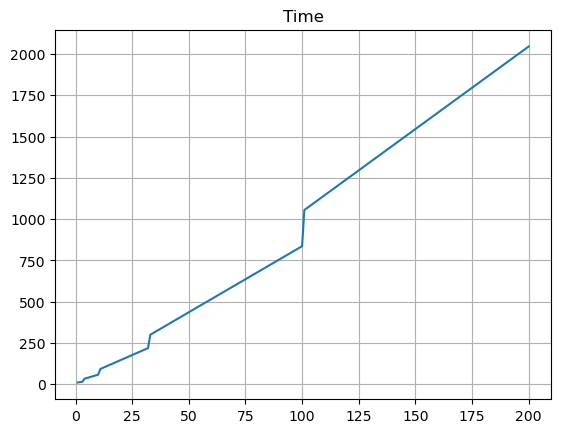

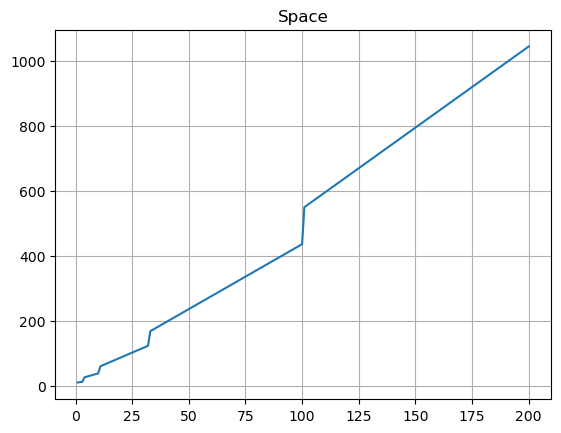

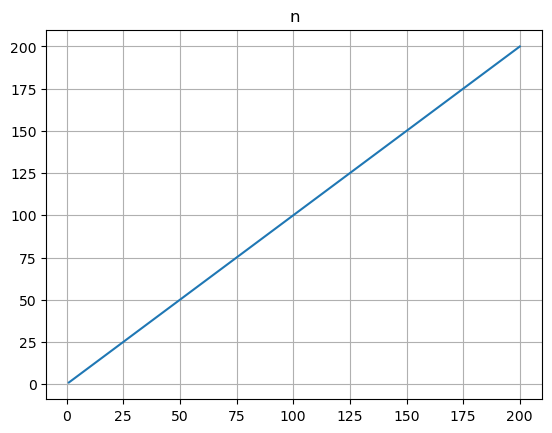

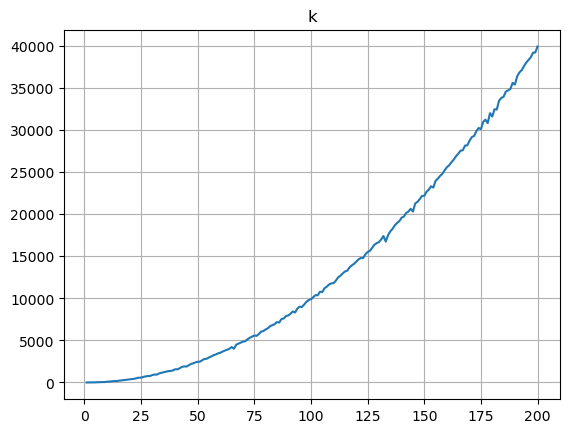

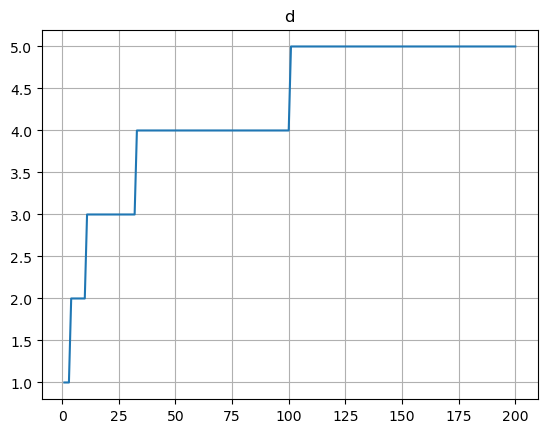

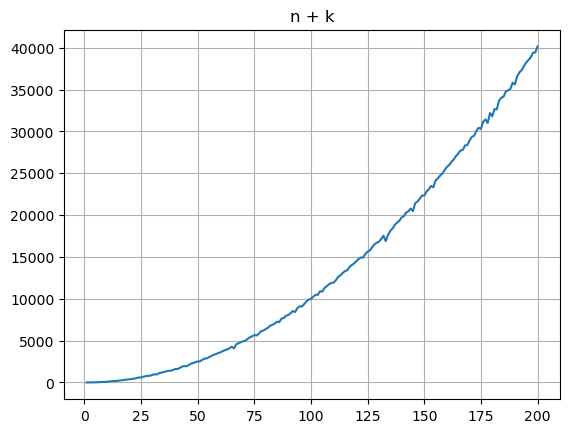

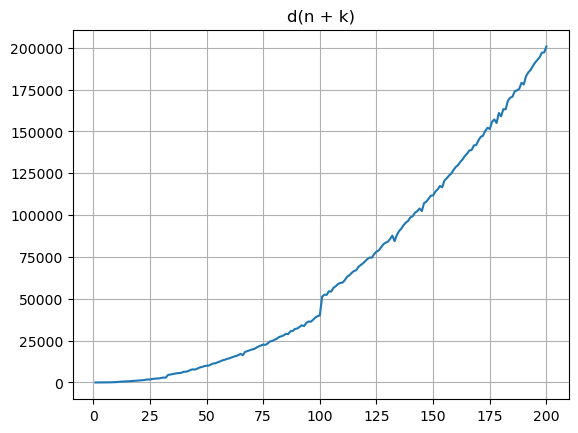

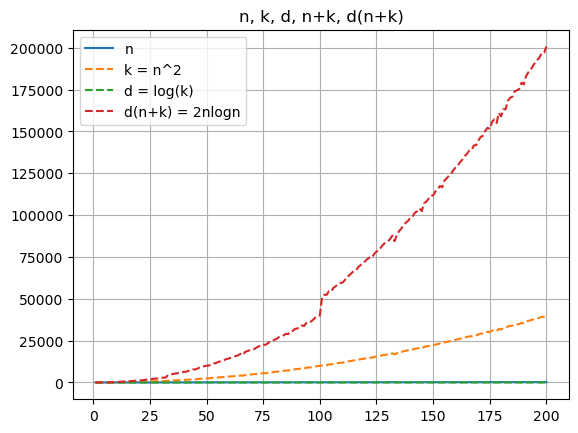

In [22]:
MAX = 200

x = []
y_time = []
y_space = []
y_n = []
y_k = []
y_d = []
y_nk = []
y_nkd = []

for i in range(1, MAX + 1):
    n_actual = i
    k_actual = n_actual ** 2

    arr = []
    aux = []
    
    create_node_arr(arr, n_actual, 2, 0, k_actual)
    
    for node in arr:
        aux.append(node.value)
        
    ordened_arr, time, space, n, k, d, nk, nkd = radix_sort_g(arr, aux)

    y_time.append(time)
    y_space.append(space)
    y_n.append(n)
    y_k.append(k)
    y_d.append(d)
    y_nk.append(nk)
    y_nkd.append(nkd)
    x.append(len(ordened_arr))

y_s = [y_time, y_space, y_n, y_k, y_d, y_nk, y_nkd]
titles = ['Time', 'Space', 'n', 'k', 'd', 'n + k', 'd(n + k)']

for i in range(len(y_s)):
    plt.title(titles[i])
    plt.plot(x, y_s[i])
    plt.grid(True)
    plt.show()
    
plt.title('n, k, d, n+k, d(n+k)')
plt.plot(x, y_n, label="n")
plt.plot(x, y_k, linestyle='--', label="k = n^2")
plt.plot(x, y_d, linestyle='--', label="d = log(k)")
plt.plot(x, y_nkd, linestyle='--', label="d(n+k) = 2nlogn")
plt.grid(True)
plt.legend()
plt.show()